<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Comprehensive Analysis of Housing Prices in Boston: Insights from U.S. Census Data

#### Import the required libraries we need for the lab.


In [28]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [29]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [30]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [31]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [32]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [33]:
boston_df.drop(columns='Unnamed: 0',inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Boxplot of Median value of owner-occupied homes')

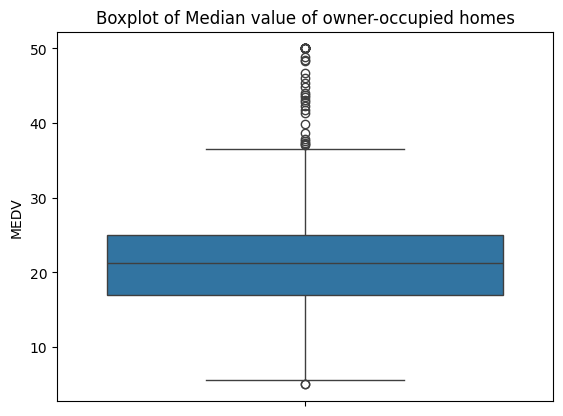

In [34]:
sns.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')

## Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Barplot of Charles river variable')

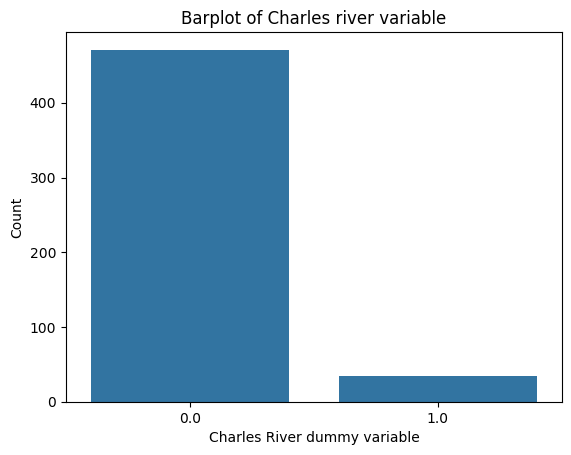

In [35]:
sns.barplot(x=boston_df['CHAS'].value_counts().index,y=boston_df['CHAS'].value_counts().values)
plt.xlabel('Charles River dummy variable')
plt.ylabel('Count')
plt.title('Barplot of Charles river variable')

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [36]:
#Define the function to categorize ages
def categorize_age(age):
    if age <= 35:
        return '<=35'
    elif 36 <= age < 70:
        return '35-75'
    else:
        return '>=70'


In [37]:
boston_df['AGE_group'] = boston_df['AGE'].apply(categorize_age)

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE')

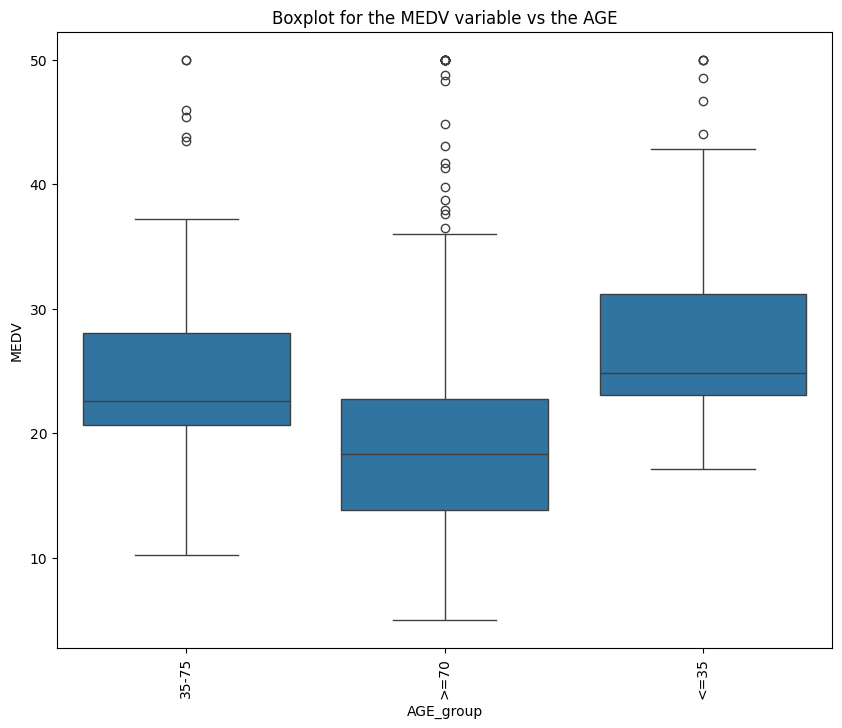

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(x='AGE_group',y='MEDV',data=boston_df)
plt.xticks(rotation=90,fontsize=10)
plt.title('Boxplot for the MEDV variable vs the AGE')

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

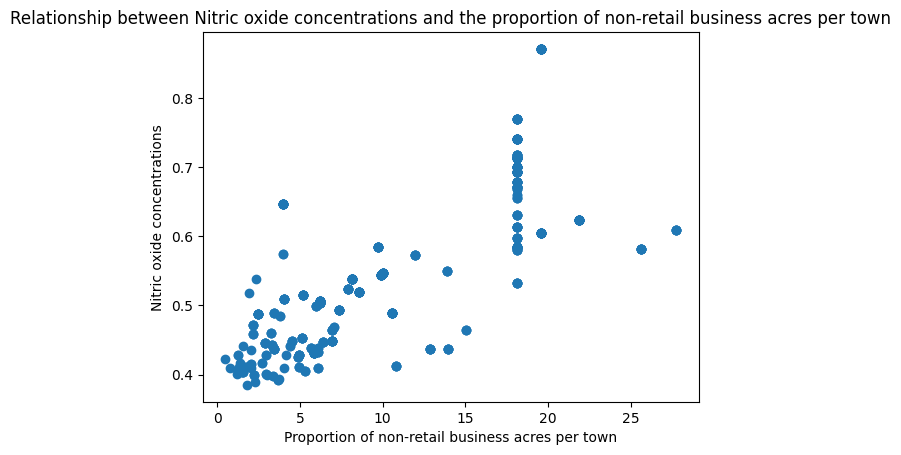

In [39]:
plt.scatter(boston_df['INDUS'],boston_df['NOX'])
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentrations')
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

## Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

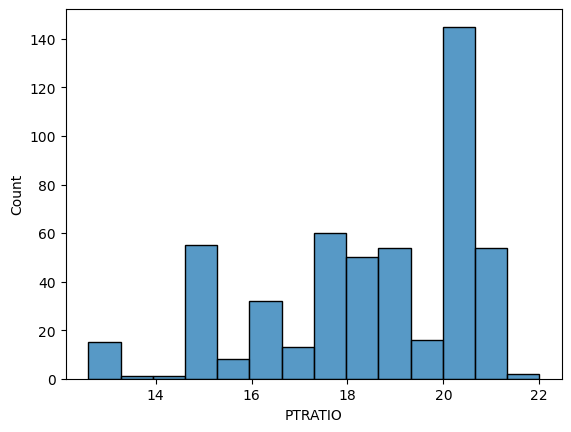

In [40]:
sns.histplot(boston_df['PTRATIO'])

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
### a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
#### H0=There is no significant difference mu1=mu2
#### H1 =There is significant diffrence mu1=!mu2

In [41]:
river_bound=boston_df[boston_df['CHAS']==1][['MEDV']]
river_unbound=boston_df[boston_df['CHAS']==0][['MEDV']]
river_bound

,MEDV
142,13.4
152,15.3
154,17.0
155,15.6
160,27.0
162,50.0
163,50.0
208,24.4
209,20.0
210,21.7


In [42]:
river_unbound

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [43]:
from scipy.stats import norm,ttest_1samp,ttest_ind,ttest_rel
test_statistics,p_value=ttest_ind(river_bound,river_unbound)
test_statistics,p_value

(array([3.99643747]), array([7.39062317e-05]))

In [44]:
#our significance interval is set as 5% 
if p_value < 0.05:
    print("Reject H0")
    print("The MEDV depend on whether its river_bound or river_unbound")
else:
    print("Fail to reject H0")
    print("The MEDV  doesn't depend on whether its river_bound or river_unbound")

Reject H0
The MEDV depend on whether its river_bound or river_unbound


### Conclution:
#### since p_value is less than 0.05.The MEDV depend on whether its river_bound or river_unbound

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
### b. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
#### H0=samples in all groups are drawn from the same populations with the same mean values
#### Ha=Atleast samples in one group is with the different mean values

In [45]:
#b. Select an appropriate test -
from scipy.stats import f_oneway

age_group1=boston_df[boston_df['AGE_group']=='35-75']['MEDV']
age_group2=boston_df[boston_df['AGE_group']=='>=70']['MEDV']
age_group3=boston_df[boston_df['AGE_group']=='<=35']['MEDV']

In [46]:
#since there are four categories we go for one way anova test 
f_stats, p_value = f_oneway(age_group1,age_group2,age_group3)
f_stats, p_value

(36.087505764984, 2.2627978632350515e-15)

In [47]:
#our significance interval is set as 5% 
if p_value < 0.05:
    print("Reject H0")
    print("Atleast samples in one group is with the different mean values")
else:
    print("Fail to reject H0")
    print("samples in all groups are drawn from the same populations with the same mean values")

Reject H0
Atleast samples in one group is with the different mean values


### Conclution:
#### since p_value is less than 0.05.Atleast samples in one group is with the different mean values

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
### c. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
#### H0=there is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
#### Ha=there is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [48]:
from scipy.stats import pearsonr
pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [49]:
#our significance interval is set as 5% 
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town")
else:
    print("Fail to reject H0")
    print("There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town")

Reject H0
There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town


### Conclution:
#### since p_value is less than 0.05.There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
### d. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

In [50]:
import statsmodels.api as sm
X=boston_df['DIS']
Y=boston_df['MEDV']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
predictions=model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        12:29:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclution:
#### since p_value is less than 0.05.There is a statistically significant reationship between additional weighted distance to the five Boston employment centres and the median value of owner occupied homesAnd here the coefficient 1. gives a linear relationship between both the features.